In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import scipy
plt.switch_backend('Qt4Agg')
%matplotlib inline

## Djordje Vukcevic/ Roberto Cai  


In [10]:
s_x = [1.2, 0.6, 0.4, 1.1, 0.7, 0.0, 0.7, 0.5, -0.9, 0.1, 
       1.3, 1.3, 0.7, 0.5, 0.9, 0.3, 0.2, 0.6, 0.2, -0.9]
s_y = [40.3, 40.5, 41.8, 40.4, 40.3, 40.3, 40.2, 40.0, 40.1, 40.0, 
       40.5, 40.2, 40.2, 40.6, 40.5, 41.2, 39.4, 40.3, 40.3, 40.0]
s_a = [0.0, -3.3, 8.1, 0.0, 1.8, 0.0, 1.8, 3.7, 0.0, 0.0, 
       -5.2, 0.0, 1.8, -3.3, -13.7, -6.5, 14.0, 1.8, -4.2, -1.8]
r_x = [26.7, 25.6, 26.4, 26.4, 25.8, 26.1, 25.5, 25.8, 26.5, 26.9, 
       25.8, 25.9, 25.4, 26.9, 25.3, 26.0, 26.4, 26.3, 26.7, 27.5]
r_y = [16.1, 17.1, 16.6, 16.3, 16.8, 16.7, 17.2, 17.0, 15.9, 16.4, 
       16.8, 16.7, 16.9, 15.9, 17.3, 16.9, 16.7, 16.2, 16.4, 15.7]
r_a = [47.5, 50.8, 49.5, 47.6, 50.8, 50.1, 50.8, 50.1, 44.3, 40.4, 
       54.1, 53.2, 50.8, 48.4, 49.2, 58.7, 43.3, 45.1, 37.9, 21.6]
l_x = [-24.9, -25.8, -25.4, -25.7, -25.5, -25.4, -25.1, -25.3, -25.0, -25.3, 
       -25.7, -25.2, -25.4, -24.9, -24.8, -25.6, -26.0, -25.1, -25.3, -25.2]
l_y = [17.1, 16.2, 16.6, 16.2, 16.0, 16.8, 16.7, 16.5, 17.1, 16.7, 
       16.0, 16.8, 16.9, 16.9, 16.9, 16.1, 16.1, 16.8, 16.8, 16.5]
l_a = [172.5, 172.8, 176.2, 168.6, 173.7, 170.7, 169.3, 172.8, 172.5, 171.0, 
       175.9, 175.9, 165.4, 169.3, 174.2, 169.2, 171.0, 164.2, 174.5, 173.4]
straight = np.asarray([[s_x[i], s_y[i], s_a[i]] for i in range(len(s_x))])
left = np.asarray([[l_x[i], l_y[i], l_a[i]] for i in range(len(l_x))])
right = np.asarray([[r_x[i], r_y[i], r_a[i]] for i in range(len(r_x))])


In [11]:
def reject_outliers(data, m = 3.):
    new_data = []
    d = np.abs(data - np.mean(data))
    mdev = np.mean(d)
    print(mdev)
    s = d/mdev 
    print(s)
    print(s<m)
    for x in range(len(data)):
        if s[x]<m:
            new_data.append(data[x])
    return new_data
xnew = reject_outliers(s_x,3)
print(xnew)
print(len(xnew))

0.44
[ 1.64772727  0.28409091  0.17045455  1.42045455  0.51136364  1.07954545
  0.51136364  0.05681818  3.125       0.85227273  1.875       1.875
  0.51136364  0.05681818  0.96590909  0.39772727  0.625       0.28409091
  0.625       3.125     ]
[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False]
[1.2, 0.6, 0.4, 1.1, 0.7, 0.0, 0.7, 0.5, 0.1, 1.3, 1.3, 0.7, 0.5, 0.9, 0.3, 0.2, 0.6, 0.2]
18


In [12]:
def outliers_iqr(data):
    new_data = []
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = np.where((data > upper_bound) | (data < lower_bound))
    for x in range(len(data)):
        if x not in outliers[0]:
            new_data.append(data[x])
    return new_data

new_data = outliers_iqr(s_x)
print(new_data)
print(len(new_data))

[1.2, 0.6, 0.4, 1.1, 0.7, 0.0, 0.7, 0.5, 0.1, 1.3, 1.3, 0.7, 0.5, 0.9, 0.3, 0.2, 0.6, 0.2]
18


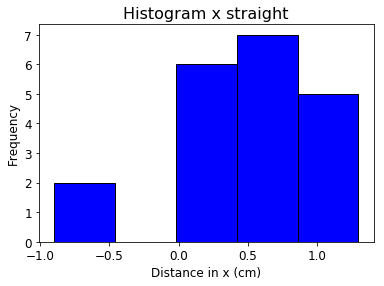

In [13]:
plt.figure(1)

# plt.subplot(131)
plt.hist(straight[:,0], bins=5, color='b', edgecolor='k')
plt.title("Histogram x straight",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Distance in x (cm)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
# plt.subplot(312)
# plt.hist(straight[:,1], bins='auto', color='b', edgecolor='k')
# plt.title("Histogram x straight",fontsize=16)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.subplot(312)
# plt.hist(straight[:,2], bins='auto', color='b', edgecolor='k')
# plt.title("Histogram x straight",fontsize=16)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

plt.show()

18
20
mean: 0.630000, std: 0.390000
[ 0.      0.1625  0.325   0.4875  0.65    0.8125  0.975   1.1375  1.3   ]
[ 0.68376068  1.02564103  0.34188034  1.36752137  1.02564103  0.34188034
  0.34188034  1.02564103]
1.0
(1.1362948593593347, 0.56657408538861698)
It is Gaussian distribution
17
20
mean: 40.280000, std: 0.180000
(0.58507004763949511, 0.7463691038811433)
It is Gaussian distribution


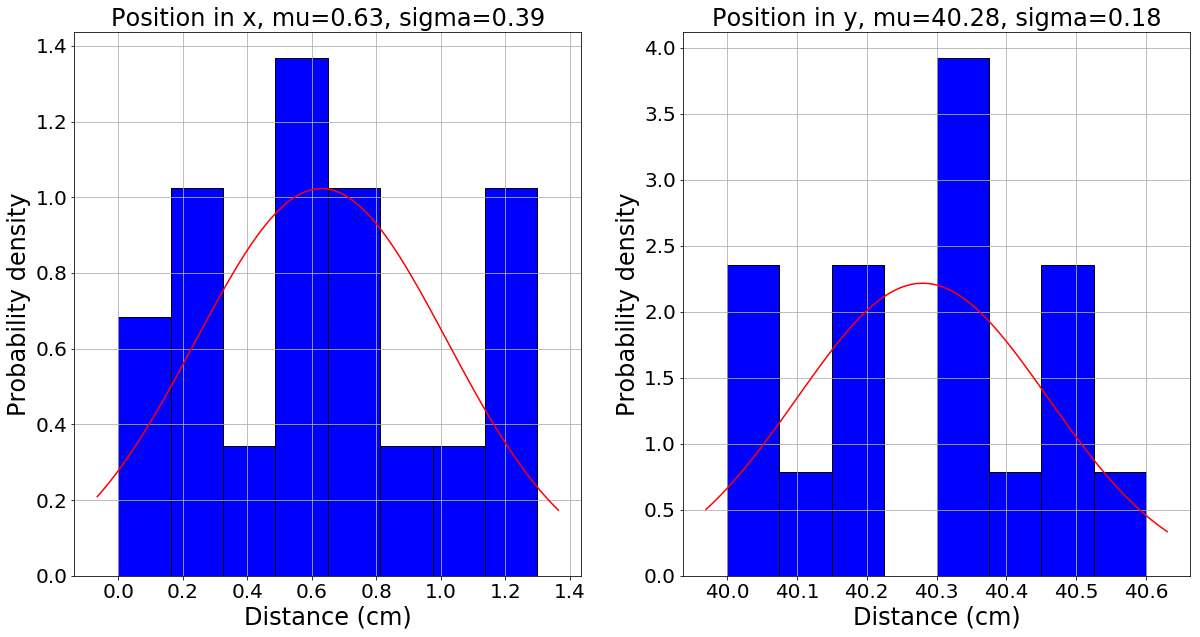

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(121)
s_x_new = outliers_iqr(s_x)
mean,std=np.round(norm.fit(s_x_new),2)
print(len(s_x_new))
print(len(s_x))
print('mean: %f, std: %f' % (mean,std))
values, bins, _ = plt.hist(s_x_new, bins=8, normed=1, color='b', edgecolor='k')
area = sum(np.diff(bins)*values)
print(bins)
print(values)
print(area)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='r')
plt.xlabel('Distance (cm)',fontsize=24)
plt.ylabel('Probability density',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.title('Position in x, mu=' + str(mean) + ', sigma=' + str(std),fontsize=24)
statistic, pvalue = scipy.stats.normaltest(s_x_new)
print((statistic, pvalue))
if pvalue > 0.05:
    print('It is Gaussian distribution')
else:
    print('It is not Gaussian distribution')
    

plt.subplot(122)
s_y_new = outliers_iqr(s_y)
mean,std=np.round(norm.fit(s_y_new),2)
print(len(s_y_new))
print(len(s_y))
print('mean: %f, std: %f' % (mean,std))
plt.hist(s_y_new, bins=8, normed=1, color='b', edgecolor='k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='r')
plt.xlabel('Distance (cm)',fontsize=24)
plt.ylabel('Probability density',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.title('Position in y, mu=' + str(mean) + ', sigma=' + str(std),fontsize=24)
statistic, pvalue = scipy.stats.normaltest(s_y_new)
print((statistic, pvalue))
if pvalue > 0.05:
    print('It is Gaussian distribution')
else:
    print('It is not Gaussian distribution')

plt.show()

20
20
mean: -25.330000, std: 0.310000
(0.4193610524771999, 0.81084324773811045)
It is Gaussian distribution
20
20
mean: 16.580000, std: 0.350000
(3.439437762483009, 0.17911649384094372)
It is Gaussian distribution


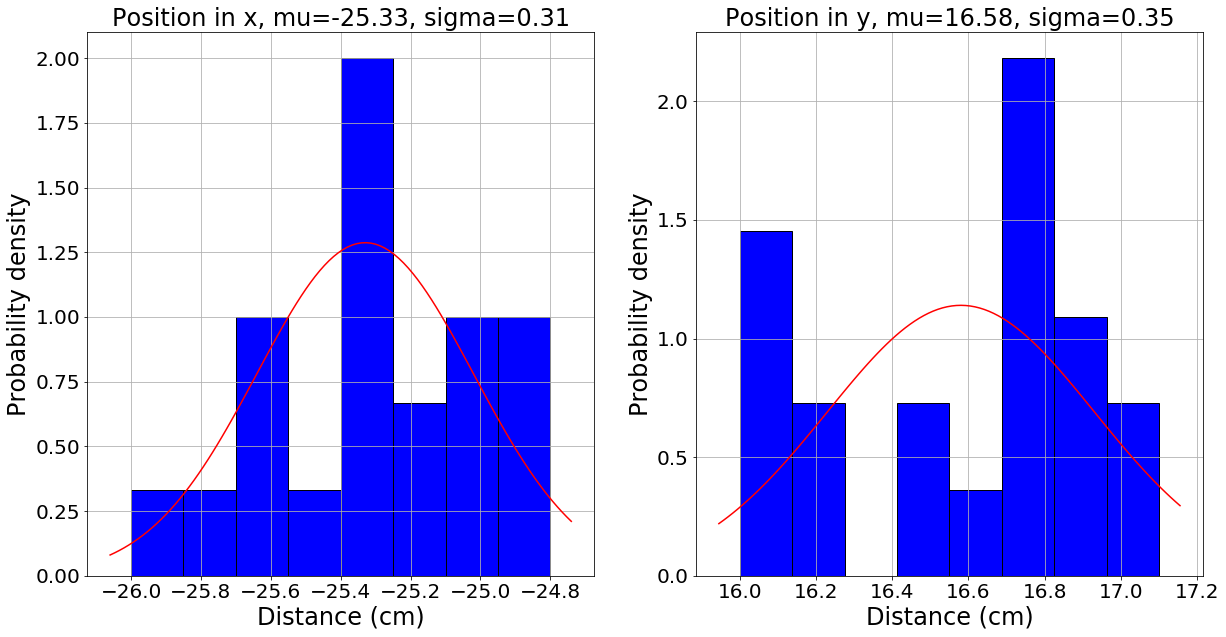

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(121)
l_x_new = outliers_iqr(l_x)
mean,std=np.round(norm.fit(l_x_new),2)
print(len(l_x_new))
print(len(l_x))
print('mean: %f, std: %f' % (mean,std))
plt.hist(l_x_new, bins=8, normed=1, color='b', edgecolor='k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='r')
plt.xlabel('Distance (cm)',fontsize=24)
plt.ylabel('Probability density',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.title('Position in x, mu=' + str(mean) + ', sigma=' + str(std),fontsize=24)
statistic, pvalue = scipy.stats.normaltest(l_x_new)
print((statistic, pvalue))
if pvalue > 0.05:
    print('It is Gaussian distribution')
else:
    print('It is not Gaussian distribution')
    
plt.subplot(122)
l_y_new = outliers_iqr(l_y)
mean,std=np.round(norm.fit(l_y_new),2)
print(len(l_y_new))
print(len(l_y))
print('mean: %f, std: %f' % (mean,std))
plt.hist(l_y_new, bins=8, normed=1, color='b', edgecolor='k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='r')
plt.xlabel('Distance (cm)',fontsize=24)
plt.ylabel('Probability density',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.title('Position in y, mu=' + str(mean) + ', sigma=' + str(std),fontsize=24)
statistic, pvalue = scipy.stats.normaltest(l_y_new)
print((statistic, pvalue))
if pvalue > 0.05:
    print('It is Gaussian distribution')
else:
    print('It is not Gaussian distribution')

plt.show()

20
20
mean: 26.200000, std: 0.560000
(0.6187154894212652, 0.73391816771423302)
It is Gaussian distribution
20
20
mean: 16.580000, std: 0.440000
(1.1126960639110242, 0.5732989148085017)
It is Gaussian distribution


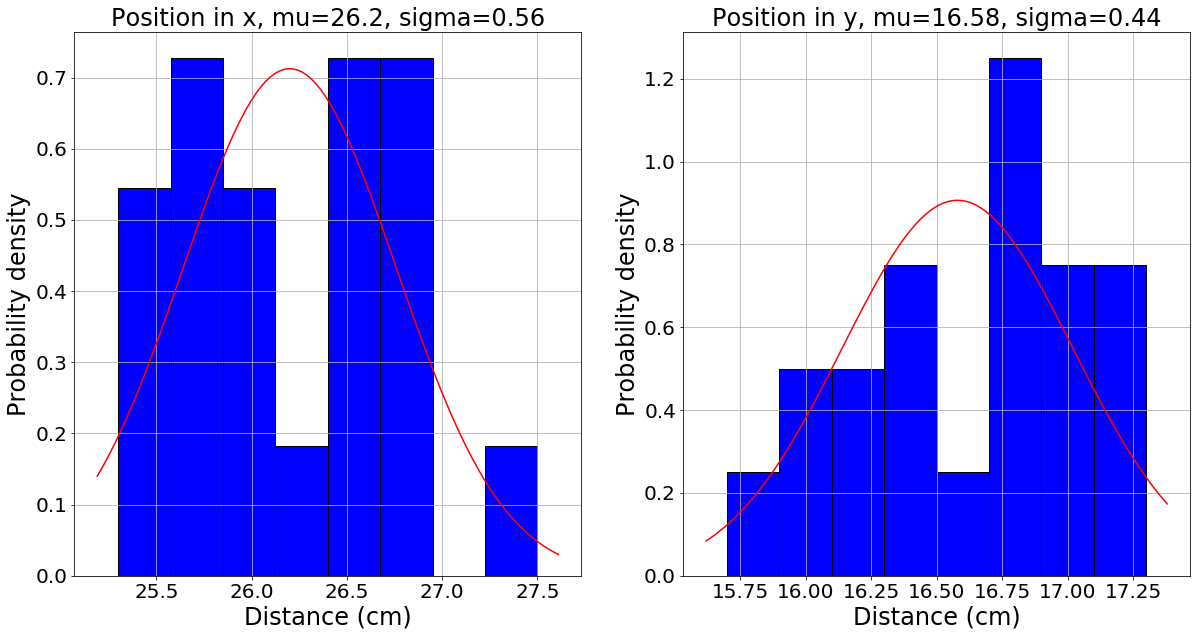

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(121)
r_x_new = outliers_iqr(r_x)
mean,std=np.round(norm.fit(r_x_new),2)
print(len(r_x_new))
print(len(r_x))
print('mean: %f, std: %f' % (mean,std))
plt.hist(r_x_new, bins=8, normed=1, color='b', edgecolor='k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='r')
plt.xlabel('Distance (cm)',fontsize=24)
plt.ylabel('Probability density',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.title('Position in x, mu=' + str(mean) + ', sigma=' + str(std),fontsize=24)
statistic, pvalue = scipy.stats.normaltest(r_x_new)
print((statistic, pvalue))
if pvalue > 0.05:
    print('It is Gaussian distribution')
else:
    print('It is not Gaussian distribution')

plt.subplot(122)
r_y_new = outliers_iqr(r_y)
mean,std=np.round(norm.fit(r_y_new),2)
print(len(r_y_new))
print(len(r_y))
print('mean: %f, std: %f' % (mean,std))
plt.hist(r_y_new, bins=8, normed=1, color='b', edgecolor='k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='r')
plt.xlabel('Distance (cm)',fontsize=24)
plt.ylabel('Probability density',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.title('Position in y, mu=' + str(mean) + ', sigma=' + str(std),fontsize=24)
statistic, pvalue = scipy.stats.normaltest(r_y_new)
print((statistic, pvalue))
if pvalue > 0.05:
    print('It is Gaussian distribution')
else:
    print('It is not Gaussian distribution')

plt.show()